In [2]:
import torch

g = torch.Generator().manual_seed(283940789)
p  = torch.tensor([2,4,1])
p = p/sum(p)
ix = torch.multinomial(p,num_samples = 1, replacement = True, generator = g)
ix

tensor([1])

In [3]:
with open('names.txt', 'r') as f:
    names = [line for line in f.read().splitlines()]
    print(names[:5])



['emma', 'olivia', 'ava', 'isabella', 'sophia']


In [4]:
chars = sorted(list(set(ch for name in names for ch in name)))
ctoi = {ch:i+1 for i,ch in enumerate(chars)}
itoc = {i+1:ch for i,ch in enumerate(chars)}
ctoi['.'] = 0
itoc[0] = '.'

In [5]:
print(chars)
print(ctoi)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [6]:
import torch
prob_mat = torch.zeros((27,27))
for name in names:
    for ch1,ch2 in zip(name[:],name[1:]):
        i1,i2 = ctoi[ch1],ctoi[ch2]
        prob_mat[i1,i2] += 1
        

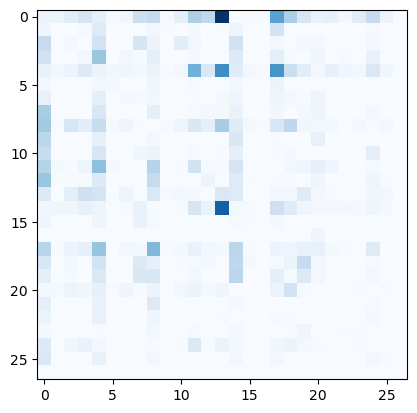

In [ ]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(16,16))
plt.imshow(prob_mat,cmap='Blues')

In [7]:
prob_mat[0,:]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.])

In [8]:
p = prob_mat.float() ; print(p.shape)
d = p.sum(axis = 1,keepdim=True); print(d.shape)
P = p/d

torch.Size([27, 27])
torch.Size([27, 1])


In [9]:
X,y = [],[]
context_size = 3
# names1 = names[:4]
for name in names:
    context = [0]*context_size
    # print(name)
    name += '.'
    for i,ch in enumerate(name):
        X.append(context)
        y.append(ctoi[ch])
        # print(f'x: {name[:i]}, y:{ch}')
        # print(context)
        context = context[1:] + [ctoi[ch]]
X = torch.tensor(X)
y = torch.tensor(y)

In [10]:
X.shape, y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [11]:
X[:3],y[:3]

(tensor([[ 0,  0,  0],
         [ 0,  0,  5],
         [ 0,  5, 13]]),
 tensor([ 5, 13, 13]))

In [56]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator = g) # Embedding Vector initialization
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn((100), generator=g) 
W2 = torch.randn((100,27), generator=g) 
b2 = torch.randn(27, generator=g) 
parameters = [C, W1, b1, W2, b2]

In [57]:
for p in parameters:
    p.requires_grad = True

In [58]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [59]:
import torch.nn.functional as F
lossi, lri = [],[]
for k in range(1000):
    ix = torch.randint(0,X.shape[0],(32,))
    #forward pass
    E = C[X[ix]] # (n * 3 * 2) 
    h = torch.tanh(E.view((-1,6)) @ W1 + b1) # E.view @ W1  = ( n * 6) @ ( 6 * 100) =  (n * 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, y[ix])
    # if (k+1)%100 == 0:
    #     print(f'loss after {k+1} iterations: {loss}')
    
    #backpropagation
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = lrs[k]
    lossi.append(loss.item())
    lri.append(lr)
    for p in parameters:
        p.data += -lr * p.grad
print(f'loss ; {loss.item()}')

loss ; 7.859070777893066


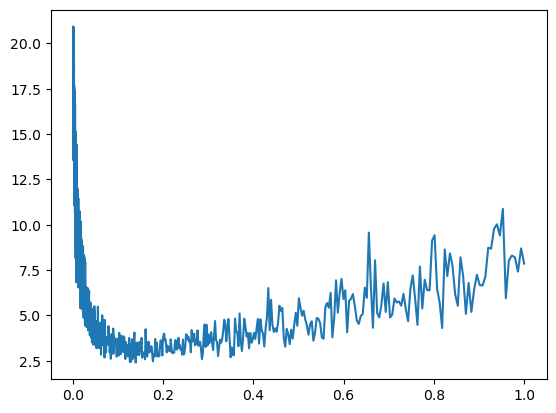

In [60]:
plt.plot(lri,lossi)

In [68]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator = g) # Embedding Vector initialization
W1 = torch.randn((30,100), generator=g)
b1 = torch.randn((100), generator=g) 
W2 = torch.randn((100,27), generator=g) 
b2 = torch.randn(27, generator=g) 
parameters = [C, W1, b1, W2, b2]

In [71]:
for p in parameters:
    p.requires_grad = True

In [72]:
import torch.nn.functional as F
lossi, stepi = [],[]
for k in range(200000):
    ix = torch.randint(0,X.shape[0],(32,))
    #forward pass
    E = C[X[ix]] # (n * 3 * 2)
    h = torch.tanh(E.view((-1,30)) @ W1 + b1) # E.view @ W1  = ( n * 6) @ ( 6 * 100) =  (n * 100)
    logits = h @ W2 + b2 
    loss = F.cross_entropy(logits, y[ix])
    # if (k+1)%100 == 0:
    #     print(f'loss after {k+1} iterations: {loss}')
    lossi.append(loss.item())
    stepi.append(k)

    #backpropagation
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 1
    for p in parameters:
        p.data += -lr * p.grad
print(f'loss ; {loss.item()}')

loss ; 3.7185349464416504


In [62]:
lossi = torch.tensor(lossi)

In [63]:
lossi.shape

torch.Size([200000])

In [64]:
a = list(range(0,200000,1000))
lossi[a]

tensor([6.5717, 3.2244, 2.8138, 2.9054, 2.5432, 2.6121, 2.5726, 2.4897, 1.9632,
        2.4185, 2.0048, 2.3701, 2.2428, 2.7096, 2.5585, 2.0697, 2.4705, 1.9963,
        2.5091, 2.0289, 2.7214, 2.3542, 2.4921, 2.5091, 2.3469, 2.2347, 2.4793,
        2.4386, 1.9755, 2.5912, 2.3649, 2.5817, 2.3698, 2.5399, 2.2110, 2.6665,
        2.7006, 2.3951, 2.7019, 2.4812, 2.6810, 2.3441, 2.7425, 2.7383, 2.0163,
        2.4466, 2.7931, 2.1955, 2.6626, 2.7774, 2.4244, 2.6389, 2.2006, 2.3364,
        2.2106, 2.9867, 2.1451, 2.1956, 2.3498, 2.5869, 2.2746, 2.3614, 2.3649,
        2.8322, 2.6814, 2.3839, 2.5573, 2.1699, 2.6384, 2.7354, 2.1438, 2.4637,
        2.5896, 2.4210, 1.8840, 2.9471, 2.8549, 2.4213, 2.5803, 2.6463, 2.5961,
        2.1643, 2.6063, 2.2806, 2.5997, 2.4805, 2.3117, 2.6249, 2.2101, 2.8373,
        2.0386, 2.1927, 2.4994, 2.5328, 2.5167, 2.6303, 2.2509, 2.5417, 2.6651,
        2.3412, 2.6439, 2.5654, 2.2820, 2.5826, 2.8224, 2.6284, 2.2252, 2.7461,
        2.4377, 2.2475, 2.5745, 2.4649, 

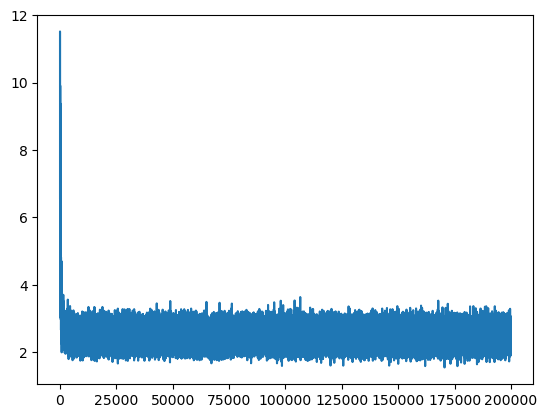

In [65]:
import matplotlib.pyplot as plt
plt.plot(stepi,lossi)